In [ ]:
#!wget -P "/content/drive/MyDrive/Colab Notebooks" https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries/download?datasetVersionNumber=3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import functions

In [3]:
filename = "/content/drive/MyDrive/Colab Notebooks/lighter_authors.json"
filename1 = "/content/drive/MyDrive/Colab Notebooks/lighter_books.json"
filename2 = "/content/drive/MyDrive/Colab Notebooks/list.json"

## Tests

In [ ]:
# Read the data
df_chunks = pd.read_json(filename1, lines=True, chunksize=200000)

# Create an empty DataFrame to store the results
df1 = pd.DataFrame()

# Loop through each chunk and append it to the result DataFrame
for chunk in df_chunks:
    chunk = chunk['author_name']
    df1 = pd.concat([df1, chunk], ignore_index=True)

In [ ]:
# Read the data
df_chunks = pd.read_json(filename, lines=True, dtype={'ratings_count': 'int32', 'text_reviews_count':'int32',
            'works_count':'int32', 'id':'int32', 'fans_count':'int32', 'name':'string', 'gender':'string', 'image_url':'string', 'average_rating':'float16', 'about':'string'}, chunksize=10000)

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Loop through each chunk and append it to the result DataFrame
for chunk in df_chunks:
    df = pd.concat([df, chunk], ignore_index=True)

In [ ]:
df.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.191406,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.019531,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.531250,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.789062,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.599609,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [ ]:
d = pd.read_json(filename1, lines=True, nrows=100)
d.language.value_counts()
dd = pd.Series(d.language.value_counts()).append(d.language.value_counts()).to_frame().reset_index()
result = dd.groupby('index').sum()
result

<ipython-input-56-5099124c8420>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dd = pd.Series(d.language.value_counts()).append(d.language.value_counts()).to_frame().reset_index()


,language
index,
,30
en-US,12
eng,152
fre,2
spa,4


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=a3cbdca54f614e61c332ba23d220fb1c5b8d8379da296164fd1ecbbd7d4f4c37
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

sc = SparkContext("local", "YourAppName")
spark = SparkSession(sc)

In [ ]:
df = spark.read.json(filename)
df

In [ ]:
specific_row = df.filter(df["title"] == "Pride and Prejudice")

# Show the specific row
specific_row.show(40)


+----+---------+-----------+--------------------+--------------+--------------------+--------------------+--------------------+------+--------------------+----------+-------------+--------+---------+-------------------------+----------------+--------------------+--------------------+-------------+---------+-----------+---------------+--------------------+------------------+-------------------+-------+
|asin|author_id|author_name|             authors|average_rating|         description| edition_information|              format|    id|           image_url|      isbn|       isbn13|language|num_pages|original_publication_date|publication_date|           publisher|         rating_dist|ratings_count|series_id|series_name|series_position|             shelves|text_reviews_count|              title|work_id|
+----+---------+-----------+--------------------+--------------+--------------------+--------------------+--------------------+------+--------------------+----------+-------------+--------+-

In [ ]:
df.show()

+--------------------+--------------+--------------------+----------+------+---+--------------------+--------------------+-------------+------------------+--------------------+-----------+
|               about|average_rating|            book_ids|fans_count|gender| id|           image_url|                name|ratings_count|text_reviews_count|            work_ids|works_count|
+--------------------+--------------+--------------------+----------+------+---+--------------------+--------------------+-------------+------------------+--------------------+-----------+
|Douglas Noël Adam...|          4.19|[386162, 13, 8695...|     19826|  male|  4|https://images.gr...|       Douglas Adams|      2862064|             62681|[3078186, 135328,...|        106|
|William McGuire "...|          4.02|[9791, 21, 28, 24...|     16144|  male|  7|https://images.gr...|         Bill Bryson|      1417316|             84176|[613469, 2305997,...|         75|
|Jude Fisher is th...|          4.53|[349254, 15222, 1.

# RQ1

### Examine the lighter authors dataset

In [4]:
#Define dtypes for dataframe
dtypes={'ratings_count': 'int32', 'text_reviews_count':'int32',
        'works_count':'int32', 'id':'string', 'fans_count':'int32',
        'name':'string', 'gender':'string', 'image_url':'string', 'average_rating':'float16',
        'about':'string'}

In [12]:
# Reduce memory usage casting more efficent data types
df = pd.read_json(filename, lines=True, dtype=dtypes)

# Printo info about the dtypes
print(df.info())
# Print summaries of quanitative variables in the df
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int32  
 1   average_rating      351767 non-null  float16
 2   text_reviews_count  351767 non-null  int32  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int32  
 6   id                  351767 non-null  string 
 7   name                351767 non-null  string 
 8   gender              351767 non-null  string 
 9   image_url           351767 non-null  string 
 10  about               351767 non-null  string 
 11  fans_count          351767 non-null  int32  
dtypes: float16(1), int32(4), object(2), string(5)
memory usage: 24.8+ MB
None
       ratings_count  average_rating  text_reviews_count   works_count  \
count   3.517670e+05   351767.000000

In [13]:
# Visualize the first 5 rows of the df
df.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.191406,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.019531,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.531250,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.789062,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.599609,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [14]:
# Check unique values
genders = df['gender'].unique()
names = df['name'].unique()
ids = df['id'].unique()

In [15]:
print('All unique gender values in the data set: ', genders)
print('Total number of unique gender values: ', len(genders))

All unique gender values in the data set:  <StringArray>
[              'male',             'female',                   '',
        'genderfluid',        'genderqueer', 'transgender female',
 'apache  Helicopter',            'Fiction',               'none',
            'Unknown',
 ...
     'I have no idea',             'Muppet',          'abbudabbi',
  'Genderqueer Femme',         'trans male',  'transgender woman',
            'Genderq',         'Non Binary',        'Genderqueen',
             'Tomboy']
Length: 150, dtype: string
Total number of unique gender values:  150


In [18]:
# Print number of unique ids and names to check if there are duplicates
print('Number of unique author ids: ', len(ids))
print('Number of unique author names: ',len(names))

Number of unique author ids:  351767
Number of unique author names:  351730


It's best to use author ids since there seems to be some cases of eponymouses

In [19]:
# Verify if there are any missing data
missing = df.isna().sum()
# Check for empty values
empty = df[df == ''].count()

print('Missing data:\n', missing)
print('\nEmpty data:\n', empty)

Missing data:
 ratings_count         0
average_rating        0
text_reviews_count    0
work_ids              0
book_ids              0
works_count           0
id                    0
name                  0
gender                0
image_url             0
about                 0
fans_count            0
dtype: int64

Empty data:
 ratings_count              0
average_rating             0
text_reviews_count         0
work_ids                   0
book_ids                   0
works_count                0
id                         0
name                       0
gender                103377
image_url                  0
about                      0
fans_count                 0
dtype: int64


Handle genders by creating a mapping to 4 categories

In [20]:
print(len(df[df.gender == 'female'] == True))
print(len(df[df.gender == 'male'] == True))

109878
138179


In [21]:
# Define category mappings
category_mapping = {
    # Male Genders
    'Male': {
        'Male', 'male', 'man', 'Man'
    },

    # Female Genders
    'Female': {
        'Female', 'Woman', 'Femme', 'She/Her/Hers', 'female'
    },

    # Non-binary Genders
    'Queer': {
        'Non-binary', 'Non-binary (multiple instances)', 'Non binary', 'Non-Binary', 'Non-binary Woman',
        'Nonbinary', 'Nonbinary Woman', 'Nonbinary genderfluid', 'Non-binary genderqueer', 'Non-binary trans guy',
        'Non-binary/transmasculine', 'Non-binary Transgender', 'Non-Binary Transgender', 'Non binary trans person', 'Non binary trans woman',
        'Non-binary Transmasculine', 'Non-Binary Woman', 'Bigender', 'Bigender (female and agender)', 'Two-spirit', 'Agender',
        'Genderqueer', 'Genderqueer transfemme', 'Genderqueer Femme', 'Genderqueer genderfluid', 'Genderqueer non-binary',
        'Genderqueer transfeminine', 'Gender Non-Conforming', 'Genderless', 'Androgynous', 'Transmasculine non-binary', 'Transfemale', 'Transgender female',
        'Transfeminine', 'Trans-female', 'Transwoman', 'Trans woman', 'Trans man', 'Male (FtM)', 'Trans-Male', 'Transman',
        'Transmasculine', 'Trans male', 'Transgender male', 'FtM',
    },
}

In [28]:
#def update_gender(gender):
#    for new_gender, mappings in category_mapping.items():
#        if gender in mappings:
#            return new_gender
#    return 'Other'  # Assign to 'Other' if not found in any category

# Apply the custom function to update the genders
import importlib
importlib.reload(functions)
df['gender'] = df['gender'].apply(functions.update_gender)

In [30]:
# The number of male and females increased since before there were
# different ways in which the same gender was defined
print(len(df[df.gender == 'Female'] == True))
print(len(df[df.gender == 'Male'] == True))

109882
138180


### Books

In [31]:
# Peek into the dataset by looking at the first 100 rows
df_chunks = pd.read_json(filename1, lines=True, nrows=100)
df_chunks.head()

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


In [5]:
# Set chunk size. By reading online it seems a good rule of thumb is to choose a chunksize around 100.000.
chunk_size = 100_000
# Set the dtypes for more efficient memory usage
dtype_mapping = {
    'id': 'int32',
    'author_id': 'int32',
    'work_id': 'int32',
    'ratings_count': 'int32',
    'text_reviews_count': 'int32',
    'average_rating': 'float16',
}

In [35]:
## Read boook file
#with pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping) as df_chunks:
#   # Initialize variables to store chunk info
#    info = {}
#    # Initialize variable for total memory usage
#    total_memory_usage = 0
#
#   # Process each chunk and gather information
#    for chunk in df_chunks:
#
#        memory_usage = chunk.memory_usage(deep=True).sum()  # Compute memory usage for the current chunk
#        total_memory_usage += memory_usage  # Add the memory usage of the chunk to the total
#
#        # Gather data types and non-null counts
#        for column in chunk.columns:
#            column_dtype = chunk[column].dtype
#
#            # Aggregate the information
#            if column in info:
#                info[column]['Data Types'].add(column_dtype)
#                info[column]['Non-Null Count'] += chunk[column].count()
#            else:
#                info[column] = {'Data Types': {column_dtype}, 'Non-Null Count': chunk[column].count()}
#
## Create a DataFrame from the gathered information
#info_df = pd.DataFrame(info).T.reset_index()
#info_df.rename(columns={'index': 'Column Name'}, inplace=True)
df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping)
importlib.reload(functions)
info_df = functions.info_bigdf(df_chunks)

# Print the aggregated info
print("Info for the Whole Data Frame:")
print(info_df)

Info for the Whole Data Frame:
                  Column Name Data Types Non-Null Count
0                          id    {int32}        7027431
1                       title   {object}        7027431
2                     authors   {object}        1668716
3                 author_name   {object}        7027431
4                   author_id    {int32}        7027431
5                     work_id    {int32}        7027431
6                        isbn   {object}        7027431
7                      isbn13   {object}        7027431
8                        asin   {object}        7027431
9                    language   {object}        7027431
10             average_rating  {float16}        7027431
11                rating_dist   {object}        7027431
12              ratings_count    {int32}        7027431
13         text_reviews_count    {int32}        7027431
14           publication_date   {object}        7027431
15  original_publication_date   {object}        7027431
16               

NameError: ignored

In [39]:
#import numpy as np
## Read the data in chunks
#df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping)
#
## Initialize variables to store statistics
#t = []
#
#missing = 0
#empty = 0
#
## Process each chunk and gather statistics
#for chunk in df_chunks:
#    missing += chunk.isna().sum()
#    empty += chunk[chunk == ''].count()
#
#    t.append(chunk[['average_rating', 'ratings_count', 'text_reviews_count']])
#
##Create a dataframe with the columns of interest
#df = pd.concat(t)
importlib.reload(functions)
df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping)
df_stats, missing, empty = functions.describe_big(df_chunks)

# Print the missing and empty data
print('Missing Data\n', missing)
print('\nEmpty Data\n', empty)

# Print the aggregated statistics
print("\nAggregated Statistics for Specific Columns")
print("\nMean:")
print(df_stats.mean())
print("\nStandard Deviation:")
print(df_stats.std())
print("\nQuantiles:")
print(df_stats.quantile([0.25, 0.5, 0.75]))
print("\nMinimum")
print(df_stats.min())
print("\nMaximum")
print(df_stats.max())

Missing Data
 id                                 0
title                              0
authors                      5358715
author_name                        0
author_id                          0
work_id                            0
isbn                               0
isbn13                             0
asin                               0
language                           0
average_rating                     0
rating_dist                        0
ratings_count                      0
text_reviews_count                 0
publication_date                   0
original_publication_date          0
format                             0
edition_information                0
image_url                          0
publisher                          0
num_pages                          0
series_id                          0
series_name                        0
series_position                    0
shelves                            0
description                        0
dtype: int64

Empty Data

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


average_rating             0.000000
ratings_count         160900.762157
text_reviews_count      4169.806200
dtype: float64

Quantiles:
      average_rating  ratings_count  text_reviews_count
0.25        3.359375            3.0                 0.0
0.50        3.810547           45.0                 5.0
0.75        4.078125          771.0                64.0

Minimum
average_rating        0.0
ratings_count         0.0
text_reviews_count    0.0
dtype: float64

Maximum
average_rating              5.0
ratings_count         7400639.0
text_reviews_count     174524.0
dtype: float64


# RQ 2

## Plot the number of books for each author in descending order.

/content/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.sort_values(by='book_count', ascending=False)


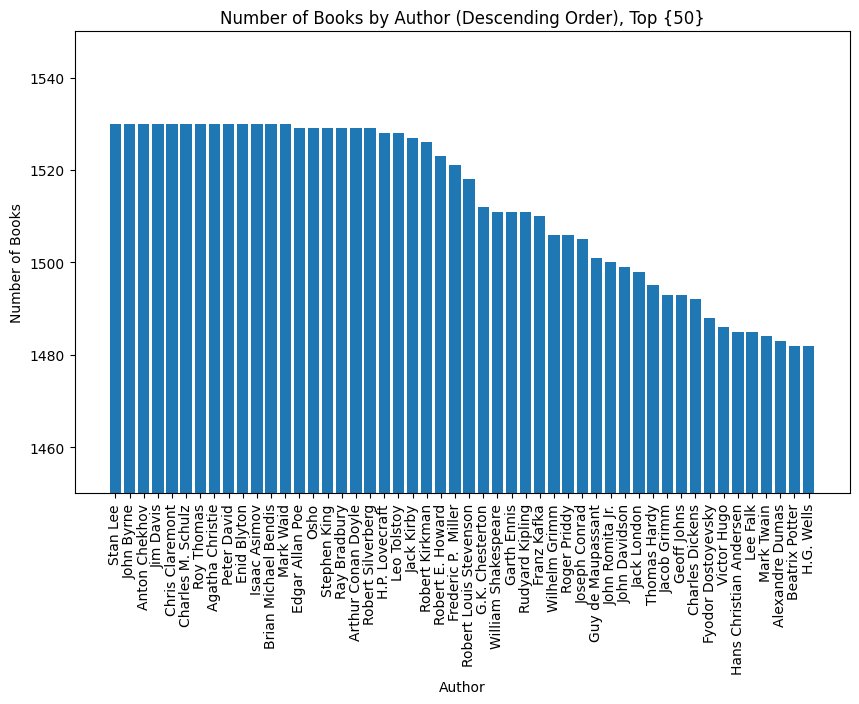

In [42]:
## Read the data
#df = pd.read_json(filename, lines=True, dtype=dtypes)
#
#def update_gender(gender):
#    for new_gender, mappings in category_mapping.items():
#        if gender in mappings:
#            return new_gender
#    return 'Other'  # Assign to 'Other' if not found in any category
#
## Apply the custom function to update the genders
#df['gender'] = df['gender'].apply(update_gender)

importlib.reload(functions)

# Since in the authors there are also publishers and companies, filter the authors using gender
# Companies and publisher will have a gender that is not female, male or queer
df = pd.read_json(filename, lines=True, dtype=dtypes)
#df_genders = df[df['gender'] != 'Other']


#def count_unique_books(book_list):
#    return len(set(book_list))

## Count the number of books for each author
#df['book_count'] = df['book_ids'].apply(count_unique_books)
#
## Sort the DataFrame in descending order by book count
#df = df.sort_values(by='book_count', ascending=False)
df_genders = functions.number_books(df_genders)

# Choose the top N authors since plotting all of them would result in a plot not very messy and not meaningful
N = 50
df_plot = df_genders.head(N)

# Plot the number of books for each author
plt.figure(figsize=(10, 6))
plt.bar(df_plot['name'], df_plot['book_count'])
plt.xticks(rotation=90)
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Number of Books by Author (Descending Order), Top {%s}' % N)
plt.ylim([1450, 1550])

plt.show();

## Which book has the highest number of reviews?

In [ ]:
# Read the data in chunks
df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping)


# Create a dictionary to store review counts for each book
review_counts = {}

# Iterate through each chunk and update the review counts
for chunk in df_chunks:
    chunk = chunk[['title', 'text_reviews_count']]
    aa.append(chunk)
    # Since there are more editions for every book, but we are interested in the book with the most reviews, not the edition,
    # we group the books by title
    chunk = chunk.groupby('title')['text_reviews_count'].sum().reset_index()


    # Update the review counts in the dictionary
    for _, row in chunk.iterrows():
        book_title = row['title']
        review_count = row['text_reviews_count']
        review_counts[book_title] = review_counts.get(book_title, 0) + review_count

# Find the book with the highest number of reviews
max_reviews_book = max(review_counts, key=review_counts.get)
max_reviews_count = review_counts[max_reviews_book]

title
                                                                           10454
! Viva la Muerte en Pattaya ¡: Novel de Tailandia                              0
! اغضبوا                                                                     361
! الجندبُ يَلهو حُرًا في شوارع القاهرة                                         5
!!!                                                                            0
                                                                           ...  
�viva Yo! Scenarios: Scenarios for Use with the �viva Yo! Wargame Rules        0
�� 263-266b                                                                    0
�� 264-302                                                                     0
�� 704-807                                                                     0
��قديشة                                                                        1
Name: text_reviews_count, Length: 4151215, dtype: int32


In [ ]:
print(max_reviews_book, max_reviews_count)

Pride and Prejudice 85759005


In [ ]:
# If instead we are interested in the edition of the book with most reviews

# Read the data in chunks
df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping)

# Create a dictionary to store review counts for each book
l = []

# Iterate through each chunk and update the review counts
for chunk in df_chunks:
    chunk = chunk[['title', 'text_reviews_count']]
    l.append(chunk)

df = pd.concat(l)

print('Title', df.sort_values(by='text_reviews_count').iloc[-1][0])
print('reviews', df.sort_values(by='text_reviews_count').iloc[-1][1])

ＫＹＯＵＨＡＮ～共犯～ (二見シャレード文庫) (Japanese Edition) 174524


## Which are the top ten and ten worst books concerning the average score?

In [ ]:
# Read the data in chunks
df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping)

# Create a dictionary to store average rating for each book
ratings = {}

# Iterate through each chunk and update the ratings
for chunk in df_chunks:
    chunk = chunk[['title', 'average_rating', 'ratings_count']]
    chunk.average_rating.apply(lambda x: x if x >= 0 else None)
    chunk.title.apply(lambda x: x if x != '' else None).dropna()
    chunk = chunk[chunk['ratings_count'] > 1]

    # Update the review counts in the dictionary
    for _, row in chunk.iterrows():
        if row['title'] in ratings:
          ratings[row['title']].append(row['average_rating'])
        else:
          ratings[row['title']] = [row['average_rating']]

for title, average_rating in ratings.items():
  ratings[title] = sum(average_rating)/len(average_rating)

sorted_d = sorted(ratings.items(), key=lambda x: x[1])
#top_ten = sorted_d[:10]
#worst_ten = sorted_d[-10:]
#
#print(top_ten, worst_ten)


[('The Hero Rises Up (Modern Plays)', 1.0), ('Constructing Animerica: History, Style and Spectatorship of Anime in the United States', 1.0), ('Sacred Interconnections: Postmodern Spirituality, Political Economy & Art (Constructive Postmodern Thought)', 1.0), ('The Mathematical Palette (with BCA/iLrn(TM) Tutorial and InfoTrac) (Advantage Series)', 1.0), ('The Infidelity Report: An Investigation Of Extramarital Affairs', 1.0), ("Medicine Dharma Reiki: An Introduction to the Secret Inner Practices, with Extensive Excerpts from Dr. Usui's Journals", 1.0), ('Larry & Lilly Potter: More Than Just Friends', 1.0), ('Garden Of Secrets', 1.0), ("Teacher's Classroom Guide to Robert Stanek's Magic Lands", 1.0), ('Healing: Music, Meditation and Prayer', 1.0)] [('Deranged Loverz 2', 5.0), ("Finding Christmas Love and Other Stories (Juliette Hill's Christmas Romances Book 1)", 5.0), ('Ethos Equinox #2', 5.0), ('Incoming: Collected Stories', 5.0), ('The Adventures of Amy', 5.0), ('Bentley The Bunny - B

In [ ]:
worst_ten = sorted_d[:10]
top_ten = sorted_d[-10:]

print('Top ten books', top_ten)
print('\nWorst ten books concerining average rating: ', worst_ten)

Top ten books [('Deranged Loverz 2', 5.0), ("Finding Christmas Love and Other Stories (Juliette Hill's Christmas Romances Book 1)", 5.0), ('Ethos Equinox #2', 5.0), ('Incoming: Collected Stories', 5.0), ('The Adventures of Amy', 5.0), ('Bentley The Bunny - Bentley learns to like Veggies', 5.0), ('Freie Stunden am Fenster', 5.0), ('Die Bücher und die Leserwelt', 5.0), ('Karya Pena Dik A 2014', 5.0), ('Seeking Paradise / Swinging in Paradise', 5.0)]

Worst ten books concerining average rating:  [('The Hero Rises Up (Modern Plays)', 1.0), ('Constructing Animerica: History, Style and Spectatorship of Anime in the United States', 1.0), ('Sacred Interconnections: Postmodern Spirituality, Political Economy & Art (Constructive Postmodern Thought)', 1.0), ('The Mathematical Palette (with BCA/iLrn(TM) Tutorial and InfoTrac) (Advantage Series)', 1.0), ('The Infidelity Report: An Investigation Of Extramarital Affairs', 1.0), ("Medicine Dharma Reiki: An Introduction to the Secret Inner Practices, w

## Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

In [ ]:
# Read the data in chunks
df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtype=dtype_mapping)

# Create a Series to store the language's count
languages = pd.Series([], dtype='object')

# Iterate through each chunk and update the languages
for chunk in df_chunks:
    #Select langauge column
    chunk.dropna(subset=['language'], inplace=True)
    # Count the values for the languages
    chunk = chunk.language.value_counts()
    # Concatenate the values in a dataframe
    languages = pd.concat([languages, chunk])


languages1 = languages.to_frame().reset_index()
result = languages1.groupby('index').sum()
result = result.reset_index()
result = result.rename(columns={'index':'lang', 0:'count'})

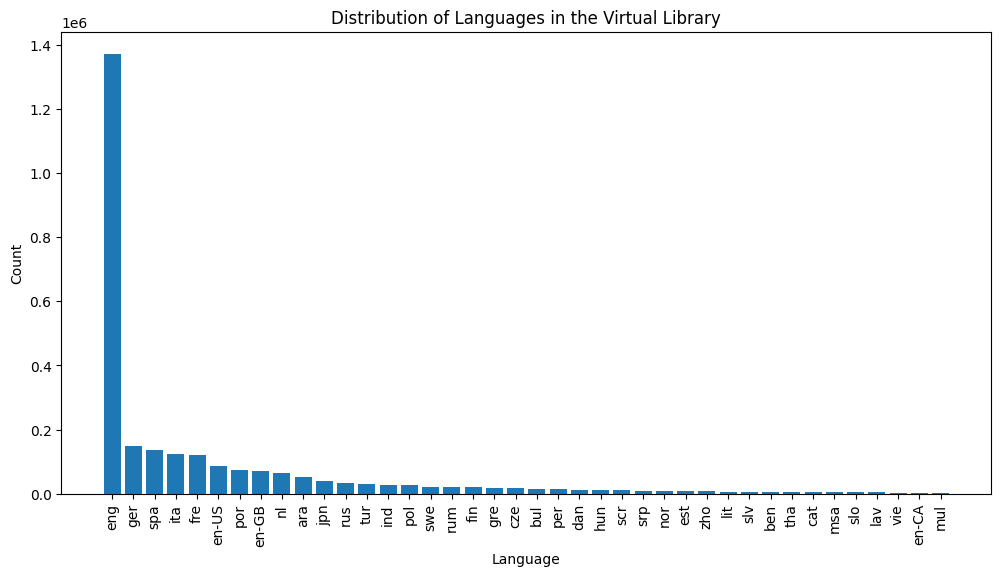

In [ ]:
res2 = result.sort_values(by='count', ascending=False)
res2 = res2.drop(0)

plt.figure(figsize=(12, 6))
plt.bar(res2['lang'][:50], res2['count'][:50])
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Languages in the Virtual Library')
plt.xticks(rotation=90)
plt.show()

### NO

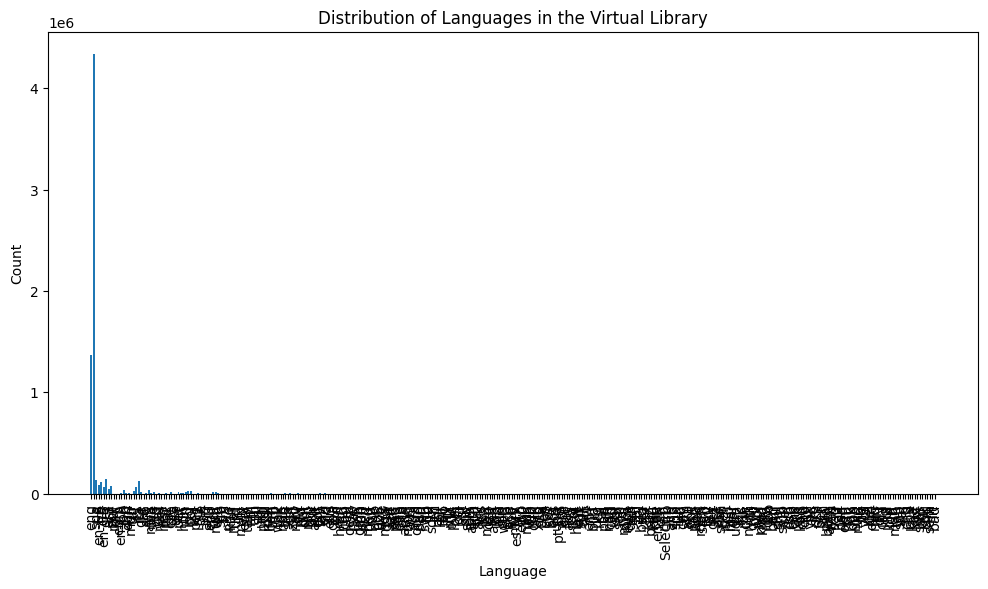

In [ ]:
# Read the data in chunks
df_chunks = pd.read_json(filename1, lines=True, chunksize=200000)

# Create a dictionary to store language counts
language_counts = {}

# Iterate through each chunk and update the language counts
for chunk in df_chunks:
    chunk = chunk[['language']]

    # Update the language counts in the dictionary
    for _, row in chunk.iterrows():
        language = row['language']
        if pd.notna(language):
            language_counts[language] = language_counts.get(language, 0) + 1

# Convert the language counts dictionary to a DataFrame
language_df = pd.DataFrame(list(language_counts.items()), columns=['Language', 'Count'])
language_df1 = language_df.drop(1)

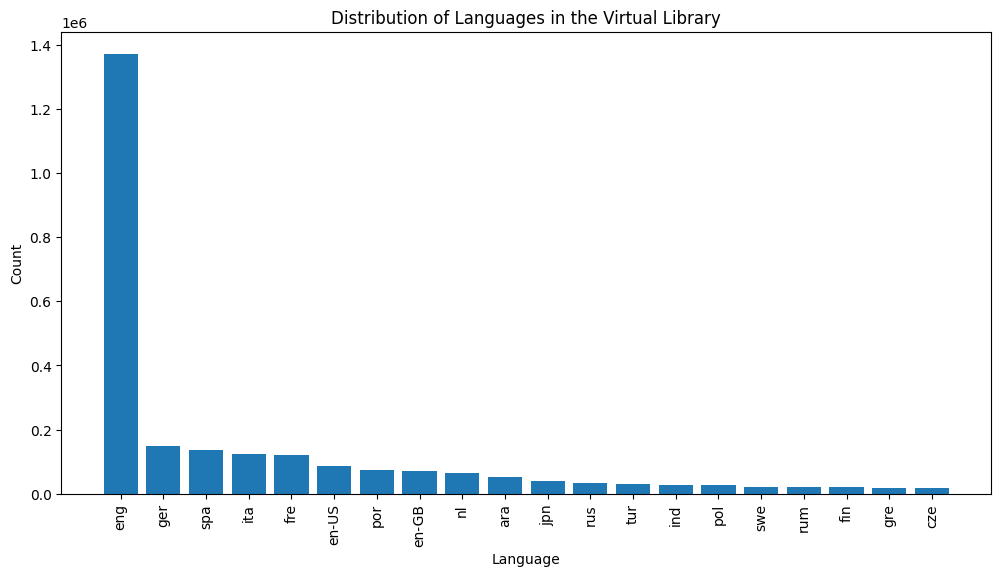

In [ ]:
# Create a bar chart to visualize the distribution of languages
language_df2 = language_df1.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(language_df2['Language'][:40], language_df2['Count'][:40])
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Languages in the Virtual Library')
plt.xticks(rotation=90)
plt.show()

## How many books have more than 250 pages?

In [ ]:
# Read the data in chunks
df_chunks = pd.read_json(filename1, lines=True, chunksize=chunk_size, dtypes=dtype_mapping)

# Create a variable to store number of books with more than 250 reviews
b_250_count = 0

# Iterate through each chunk
for chunk in df_chunks:
    # subselect only the column that contains the number of pages
    chunk = chunk[['num_pages']]
    # clean the data and convert the datatype
    chunk = chunk[chunk['num_pages'] != '']
    chunk = chunk.dropna(subset=['num_pages'])
    chunk['num_pages'] = chunk['num_pages'].astype('uint32')
    # Update the count
    b_250_count += chunk[chunk['num_pages'] > 250]['num_pages'].count()

print('The books with more than 250 pages are:', b_250_count)
# Runtime 13 min

1810335


## Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

In [50]:
# Read the data
df = pd.read_json(filename, lines=True, dtype=dtypes)
def count_unique_books(book_list):
    return len(set(book_list))

def update_gender(gender):
    for new_gender, mappings in category_mapping.items():
        if gender in mappings:
            return new_gender
    return 'Other'

# Apply the custom function to update the genders
df['gender'] = df['gender'].apply(update_gender)

# FIlter by gender to remove publishers and companies
df = df[df['gender'] != 'Other']
# Ensure fans count is > 0 and not Null
df['fans_count'] = df.fans_count.apply(lambda x: x if x > 0 else None)
df.dropna(subset=['fans_count'], inplace=True)

# Count the number of books for each author
df['book_count'] = df['book_ids'].apply(count_unique_books)

# Sort the DataFrame in descending order by book count
df = df.sort_values(by='book_count', ascending=False)

# One author seems an outlier so remove it
#df_filtered = df[df['name'] != 'Stephen King']

# Create a dataframe with only the top 50 authors
top_50_authors = df['id'][:50]
df_top_50_authors = df[df['id'].isin(top_50_authors)]

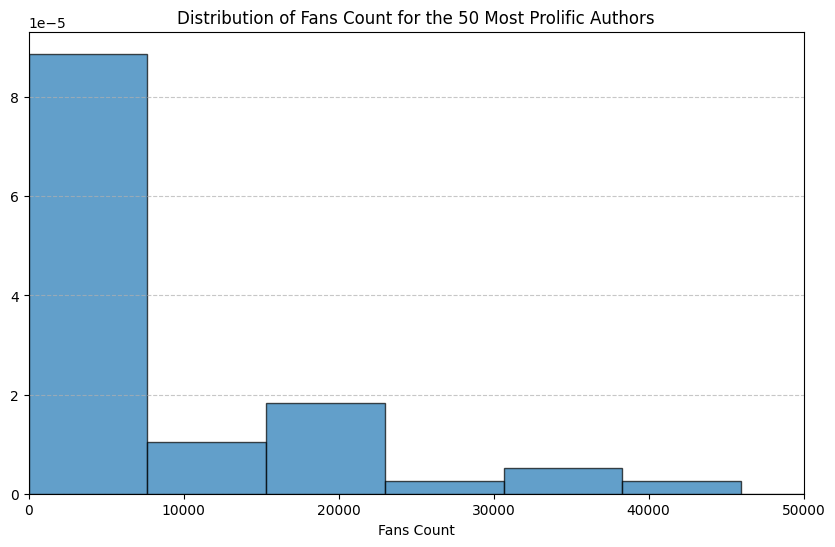

In [53]:
# Create a histogram to plot the distribution of fans count
plt.figure(figsize=(10, 6))
plt.hist(df_top_50_authors['fans_count'], bins=100, edgecolor='k', alpha=0.7, density=True)
plt.xlabel('Fans Count')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim([0, 50_000])

plt.show()

In [59]:
print('There is an outlier that we excluded from the representation (not from the distribution)', df_top_50_authors.loc[df_top_50_authors.fans_count.idxmax(), 'name'], 'that has # of fans', df_top_50_authors.loc[df_top_50_authors.fans_count.idxmax(), 'fans_count'])

There is an outlier that we excluded from the representation (not from the distribution) Stephen King that has # of fans 766035.0


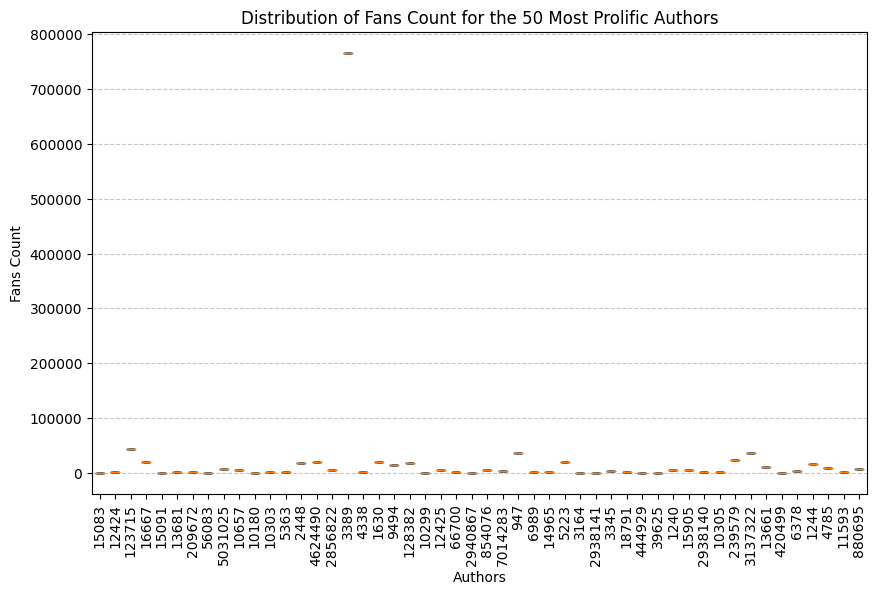

In [60]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_top_50_authors[df_top_50_authors['id'] == author]['fans_count'] for author in top_50_authors], labels=top_50_authors)
plt.xlabel('Authors')
plt.ylabel('Fans Count')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# RQ3

In [6]:
df_chunks = pd.read_json(filename1, lines=True, chunksize=100_000, dtype=dtype_mapping)

# Create an empty DataFrame to store the results
df_books = pd.DataFrame()
# Read the data in chunks
for chunk in df_chunks:
    chunk = chunk[['id', 'title', 'original_publication_date', 'num_pages', 'series_id',
                 'series_name', 'author_name', 'author_id', 'average_rating', 'format',
                 'rating_dist', 'ratings_count', 'text_reviews_count']]
    df_books = pd.concat([df_books, chunk], ignore_index=True)

## Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.

In [7]:
from datetime import datetime
#We create two different lists, date with the entire original publication date in tuples, and date_y with just the year.
#The problem is that for some books the month is missing.
date_y=[]
date_m=[]
for i in df_books.original_publication_date:
    date_y.append(i.split('-')[0])
    #Some books don't have the specified month of publication date, but just the year.
    #So we create a list for the months and when it is not specified we insert 0.
    if len(i.split('-')) > 1:
        date_m.append(i.split('-')[1])
    else:
        date_m.append(0)

# Convert the date strings to a consistent date format
#date_format = '%Y-%m-%d'
#df_books['original_publication_date'] = pd.to_datetime(df_books['original_publication_date'], format=date_format, errors='coerce')

#def date_y(date):
#    if pd.notna(date):
#        return int(date.year)
#    else:
#        return 0
#
#def date_m(date):
#    if pd.notna(date):
#        return int(date.month)
#    else:
#        return 0


#df_books['publication_year'] = df_books.original_publication_date.apply(date_y)
#df_books['publication_month'] = df_books.original_publication_date.apply(date_m)

date_y = ['0' if i == '' else i for i in date_y]

date_y = [int(i) for i in date_y]
date_m = [int(i) for i in date_m]
#We add the column with the years and the months
df_books['publication_year'] = date_y
df_books['publication_month'] = date_m
df_books['num_pages'] = df_books['num_pages'].replace('', '0')
df_books['num_pages'] = df_books['num_pages'].astype(int)
# We filter the books based on the publication year
# We remove books published after 2024 and before 31 since this year may come from an
# incorrect format of the date %d-%m
filter = (df_books['publication_year'] > 99) & (df_books['publication_year'] < 2024)
df_books_filtered_y = df_books[filter]

In [11]:
filter = (df_books['publication_year'] > 99) & (df_books['publication_year'] < 2024)
df_books_filtered_y = df_books[filter]

In [ ]:
#df_books[df_books.title == 'Cancioneiro da Ajuda - volume 1']

,id,title,original_publication_date,num_pages,series_id,series_name,author_name,author_id,average_rating,format,rating_dist,ratings_count,text_reviews_count,parsed_dates,publication_year,publication_month
2573381,10271670,Cancioneiro da Ajuda - volume 1,05-25,994,,,Carolina Michaëlis de Vasconcelos,14760776,5.0,Hardcover,5:1|4:0|3:0|2:0|1:0|total:1,1,0,None,0,0


In [13]:
print(len(df_books))
print(len(df_books_filtered_y))

7027431
6583754


In [12]:
from statistics import mode
def info_year(year):
    books = df_books[df_books['publication_year'] == year]

    #The number of books published that year:
    published_b = len(books.index)

    #The total number of pages written that year:
    #books['num_pages']= books['num_pages'].replace('', '0')
    #books['num_pages']= books['num_pages'].astype(int)
    num_pages = books['num_pages'].sum()

    #The most prolific month of that year:
    months = books['publication_month']
    months_small = []
    for i in months: #Eliminating the 0 that are the unspecified months
        if i != 0 and i < 13:
            months_small.append(i)
    if months_small:
        frequent_month = mode(months_small)
    else: #In the case this list is empty, it means that the months were all 0 (not specified)
        frequent_month = "There isn't enough information to find the most prolific month of this year"

    #The longest book written that year:
    index_max = books['num_pages'].idxmax() #Estracting the index of the maximum
    longest_b = books.loc[index_max, 'title']


    return(published_b, num_pages, frequent_month, longest_b)

## Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.



In [14]:
years = df_books_filtered_y['publication_year'].unique() #years is the primary key
list_years = [[i] + list(info_year(i)) for i in years]

df_years = pd.DataFrame(list_years, columns = ['years', 'published_books', 'tot_num_pages', 'most_frequent_month', 'longest_book'])
df_years.sort_values(by='years', inplace=True)
print('First ten years registered:')
print(df_years.head(10))
print('\nLast ten years registered:')
print(df_years.tail(10))

First ten years registered:
      years  published_books  tot_num_pages  \
363     100              563         123985   
972     101                3            192   
661     102               24           2605   
442     103               35           5114   
832     104                9           2628   
775     105                2            698   
1097    106                2            106   
982     107                2            107   
287     108               46           8075   
569     109               57           8190   

                                    most_frequent_month  \
363                                                   1   
972   There isn't enough information to find the mos...   
661   There isn't enough information to find the mos...   
442                                                   1   
832                                                   1   
775                                                   3   
1097                                     

We see that, despite the filtering that we did, there are still some obvious mistakes in the dataset. Ex dreams and echoes

# RQ4

In [15]:
df = pd.read_json(filename, lines=True, dtype=dtypes)

## You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [16]:
duplicates = df.name[df['name'].duplicated(keep=False)]
print(duplicates)
if len(duplicates) == 0:
  print("It's true, there are no eponymous authors")
else:
  print("It's not true, there are eponymous authors")

1569             Peter King
4792            David Yates
6414            Paul Graham
7193          Peter  Davies
8639        Peter  Marshall
                ...        
314855        Dimitar Dimov
315853    James C.L. Carson
319671        Erin  Bedford
337525              Cicerón
345485        Erin  Bedford
Name: name, Length: 74, dtype: string
It's not true, there are eponymous authors


## Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [17]:
def books_dict(author_ids, dataframe):
  diz = dict()
  for i in author_ids:
    author_books = dataframe[dataframe['author_id'] == int(i)]
    titles = list(author_books['title'])
    diz[i] = titles

  return(diz)

## What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [21]:
authors_total = df[['average_rating', 'id','name', 'ratings_count']]
authors_total = authors_total.sort_values(by='average_rating', ascending=False)
authors_total = authors_total[authors_total.ratings_count > 1]
authors_20top = authors_total[:20] #Find the top 20 authors
diz_20top = books_dict(authors_20top['id'], df_books)

max_t = 0
for id, titles in diz_20top.items():
  for i in titles:
    if len(i) > max_t:
        max_t = len(i)
        longest_book = i
print("\nThe longest book title among the books of the top 20 authors regarding their average rating is:\n", longest_book)


The longest book title among the books of the top 20 authors regarding their average rating is:
 What's Your Motivation?: Identifying and Understanding What Drives You


In [22]:
print(authors_20top)

        average_rating        id                      name  ratings_count
180568             5.0  20890814            HARSHIT PORWAL              3
180657             5.0  17556718        Harry L. Munsinger              2
180628             5.0  21222299          William  Manning              2
180620             5.0   4444870         John Kerr Tiffany              4
180607             5.0   4444483                Tux Toledo              5
303354             5.0  13537047  Elizabeth Roberts-Zibbel              5
303366             5.0  13538021             Jenna Cornell             14
180709             5.0   4447710           Daniel LaFavers              4
37114              5.0  17015962            Candice Landau              2
180417             5.0   4435832          Stephen Emmerson              3
180676             5.0   4446700       Spencer M. Aronfeld              2
303276             5.0  13531911                Susan Baer              4
181055             5.0  17559128      

In [23]:
print(diz_20top)

{'20890814': [], '17556718': ['Readings in child development', 'Human Quality Control; The Breeding And Feeding Of Genius', 'Principles Of Abnormal Psychology', 'Fundamentals Of Child Development', 'Readings in Child Development', 'Fundamentals of child development'], '21222299': [], '4444870': ['History of the postage stamps of the United States of America', 'History of the Postage Stamps of the United States of America', 'History of the Postage Stamps of the United States of America', 'History of the Postage Stamps of the United States', 'The Philatelical Library'], '4444483': ['The Lovable Rogue Mysteries', 'The Lovable Rogue Mysteries'], '13537047': ['The Migraine Diaries #1: Diagnosis [1981]'], '13538021': ['Fantastic Illusions of Life, Love, the Birds, and the Bees'], '4447710': ['Broken Mirror', "Carpenter's Mark", "Carpenter's Mark"], '17015962': [], '4435832': ['Attack Of The Gas Powered Angels'], '4446700': ['Sara Rose, Kid Lawyer'], '13531911': ["Conceit: It's All About Jake

In [24]:
#df[df.id == '229']

In [25]:
#df[df.id == '20885296']

In [27]:
longest_all_idx = df_books['title'].apply(len).idxmax()

# Retrieve the title with the maximum length
longest_all = df_books.loc[longest_all_idx, 'title']

if longest_all == longest_book:
    print('It is')
else:
    print('It is not the longest overall')

It is not the longest overall


## What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.


In [28]:
shortest_all_idx = df_books['title'].apply(len).idxmin()
# Retrieve the title with the maximum length
shortest_all = df_books.loc[shortest_all_idx, 'title']
print('Title', shortest_all) # Title empty

# Alternative answer: remove books with empty title
df_bt = df_books[df_books.title != '']
shortest_all_idx = df_bt['title'].apply(len).idxmin()
# Retrieve the title with the maximum length
shortest_all = df_bt.loc[shortest_all_idx, 'title']
print('Title', shortest_all) # Books with a one letter title exist (eg Q by Lither Blisset)

Title 
Title a


# RQ5

## We can consider the authors with the most fans to be influential. Let’s have a deeper look. Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [29]:
df['books_count'] = df['book_ids'].apply(len)

In [30]:
#Ordering by fan count
authors_influential = df.sort_values(by = 'fans_count', ascending = False)
authors_influential = authors_influential[:10] #uno per fans ed uno per book o doppio sort
#Ordering by number of books
authors_influential['books_count'] = authors_influential['book_ids'].apply(len)
authors_influential = authors_influential.sort_values(by = 'books_count', ascending = False)
print("The top 10 most influential authors are:\n", authors_influential['name'])

most_influent = authors_influential.iloc[0]
print("The most influential author is: ", most_influent['name'])

The top 10 most influential authors are:
 1017             Stephen King
1161          James Patterson
27110         Cassandra Clare
4537             Rick Riordan
169374          Veronica Roth
205870         Colleen Hoover
100166             John Green
3818      Neil deGrasse Tyson
32358            Mindy Kaling
6397              Bill  Gates
Name: name, dtype: string
The most influential author is:  Stephen King


<ipython-input-35-07e28a0f6172>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
<ipython-input-35-07e28a0f6172>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


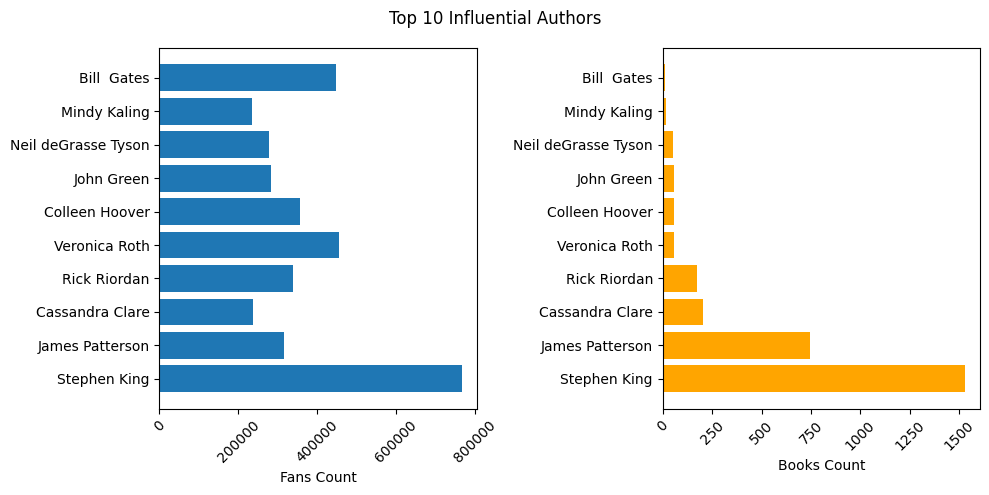

In [35]:
# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Top 10 Influential Authors")

# Plot fan count
ax[0].barh(authors_influential['name'], authors_influential['fans_count'])
ax[0].set_xlabel('Fans Count')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


# Plot number of books
ax[1].barh(authors_influential['name'], authors_influential['books_count'], color='orange')
ax[1].set_xlabel('Books Count')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Have they published any series of books? If any, extract the longest series name among these authors.

In [36]:
names_influent = authors_influential['name']
influent = df_books[df_books['author_name'].isin(names_influent)]

In [ ]:
# Stessa funzione di sotto
#max = 0
#longest_series_name = None #in the case there isn't a serie name
#names_series = influent['series_name']
#for j in names_series:
#  if len(j) > max:
#    max = len(j)
#    longest_series_name = j
#
#if longest_series_name != None:
#  print("\nThe longest series name is: ", longest_series_name)
#else:
#  print("\nThere isn't a longest serie name.")



The longest series name is:  Percy Jackson and the Olympians: The Graphic Novels


In [38]:
#Locate index of the series with longest title
series_max = influent.series_name.apply(len).idxmax()
longest = influent.loc[series_max, 'series_name']
if len(longest) > 0:
    print("The longest series name is: ", longest)
else:
  print("There isn't a longest serie name.")

The longest series name is:  Percy Jackson and the Olympians: The Graphic Novels


## How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

In [42]:
##First we create a dictionary with the author name as the key and the formats as the elements for each one.
#def format_dict(author_name, dataframe):
#  diz = dict()
#  influent_10 = dataframe[dataframe['author_name']==author_name]
#  formats= list(influent_10['format'])
#  diz[author_name]=formats
#
#  return(diz)
#
#formats_count = {}
#for i in names_influent:
#    diz_format = format_dict(i, df_books)
#
#    #Calculating the number of unique formats for the author i
#    formats_set = set(diz_format[i])
#    formats_count[i] = len(formats_set)
#
##Then we see if there are duplicates in the format.
#count=0
#for i in diz_format.values():
#  if len(set(i)) != len(i):
#    count = count+1
#if count==0:
#  print("\nThere are no author with different formats publications.\n")
#if count==1:
#  print("\nThere is ", count, " author with different formats publications.\n")
#else:
#  print("\nThere are ", count, " author with different formats publications.\n")
#
##Histogram
##All the formats in a list
#formats_all = [i for j in diz_format.values() for i in j]
##Creating a dictionary that connets the formats to their index
#unique_form = np.unique(formats_all)
#diz_form_index = {} #creating a dictionary with all the formats and the corrispondent index
#for index, format in enumerate(unique_form):
#  diz_form_index[format]=index
##Converting the formats in numeric indexes
#formats_numbers = [diz_form_index[i] for i in formats_all]
##Calculating the histogram
#hist, bin_edges = np.histogram(formats_numbers, bins=np.arange(len(unique_form)+1))
##Bar chart
#plt.bar(unique_form, hist, color='red')
#plt.xlabel('Formats')
#plt.ylabel('Number of books')
#plt.title("Distribution of the book's formats")
#plt.xticks(rotation=45, ha='right')  #Ruotating every name of the bars of 45° and putting them to the right
#plt.tight_layout() #To be sure that the labels are not overlap
#plt.show()
#From the histogram about the distribution of the formats we can see that the
#first format represented don't have a label. This is due to the fact that a
#lot of these books (more than 35 books of the influent authors) don't have this
#information specified in the data.

In [41]:
#Group influent authors by author name and count format values
a_formats = influent.groupby(['author_name']).format.value_counts()
# transform to datframae and change column name
af = a_formats.to_frame()
af.columns = ['count']

for i in influent['author_name'].unique():
    print('\n', i, '\n', af.loc[i])


 Stephen King 
                                              count
format                                            
Paperback                                     2841
Hardcover                                     1437
                                              1175
Mass Market Paperback                          510
ebook                                          344
Audiobook                                      198
Audio CD                                       193
Kindle Edition                                 104
Audio Cassette                                  82
Audible Audio                                   57
Library Binding                                 47
Audio                                           39
MP3 CD                                          18
Preloaded Digital Audio Player                  13
Unknown Binding                                 10
Leather Bound                                    9
School &amp; Library Binding                     5
Paperback with

In [51]:
af = af[af['count'] > 6]

In [52]:
# Group by 'author_name' and 'format' and sum the 'count' values
grouped_df = af.groupby(['author_name', 'format'])['count'].sum().unstack(fill_value=0)
grouped_df

format,,Audible Audio,Audio,Audio CD,Audio Cassette,Audiobook,Hardcover,Kindle Edition,Library Binding,MP3 CD,Mass Market Paperback,Paperback,Preloaded Digital Audio Player,Unknown Binding,ebook
author_name,,,,,,,,,,,,,,,
Bill Gates,37,0,0,0,0,0,15,0,0,0,0,20,0,0,0
Cassandra Clare,183,0,0,31,0,45,184,68,0,0,0,343,0,0,106
Colleen Hoover,46,0,0,0,0,0,12,21,0,0,0,84,0,0,27
James Patterson,1338,24,142,514,0,318,794,41,0,0,77,1440,0,41,869
John Green,92,0,0,46,0,16,100,16,0,0,0,244,0,0,64
Neil deGrasse Tyson,14,0,0,0,0,0,14,0,0,0,0,24,0,0,11
Rick Riordan,237,11,0,73,0,43,281,28,0,0,0,379,0,0,73
Stephen King,1175,57,39,193,82,198,1437,104,47,18,510,2841,13,0,344
Veronica Roth,100,0,0,0,0,27,102,23,0,0,0,176,0,0,80


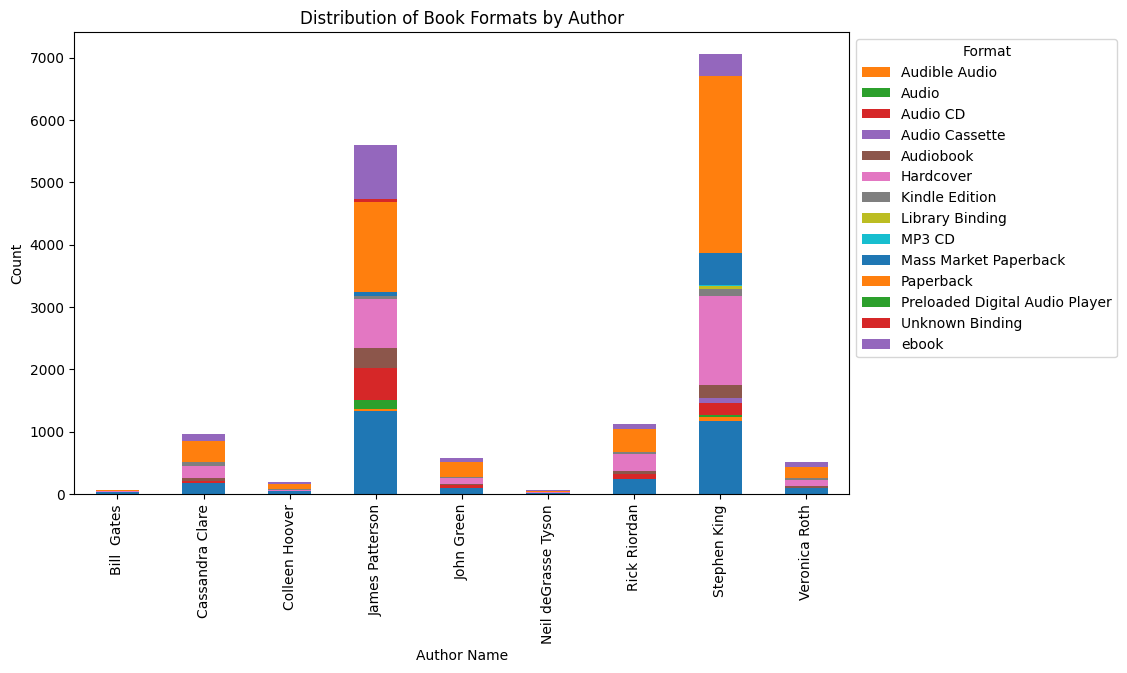

In [53]:
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Author Name')
plt.ylabel('Count')
plt.title('Distribution of Book Formats by Author')
plt.legend(title='Format', bbox_to_anchor=(1, 1))

plt.show()

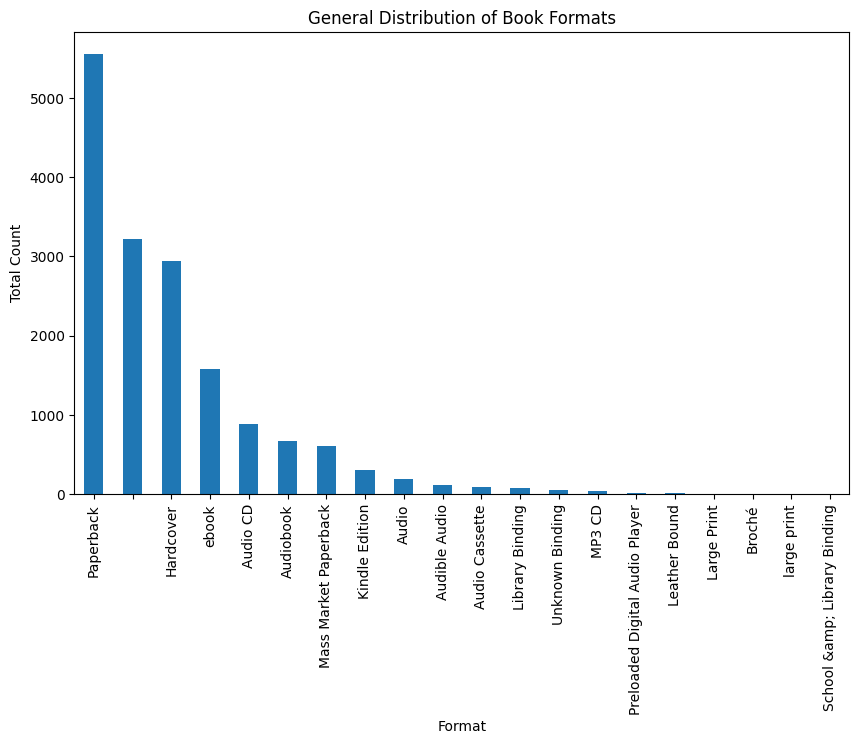

In [ ]:
# Group by 'format' and sum the 'count' values
grouped_df = af.groupby('format')['count'].sum()
# Choose 20 most frequent formats
grouped_df = grouped_df.sort_values(ascending=False).head(20)

# Plot the data as a bar chart
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Format')
plt.ylabel('Total Count')
plt.title('General Distribution of Book Formats')
plt.xticks(rotation=90)

plt.show()

## Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:

In [ ]:
info_influent = authors_influential[['name', 'gender', 'average_rating', 'ratings_count', 'text_reviews_count',
                    'fans_count']]
info_influent.gender = info_influent.gender.apply(lambda x: 'male' if x == '' else x)
info_influent.loc[info_influent['name'] == 'Mindy Kaling', 'gender'] = 'female'
info_influent

<ipython-input-116-751109c3076c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_influent.gender = info_influent.gender.apply(lambda x: 'male' if x == '' else x)


,name,gender,average_rating,ratings_count,text_reviews_count,fans_count
1017,Stephen King,male,4.039062,15195579,608956,766035
1161,James Patterson,male,3.980469,6514711,333220,317040
27110,Cassandra Clare,female,4.238281,7401435,416177,238560
4537,Rick Riordan,male,4.320312,9144089,354145,339346
169374,Veronica Roth,female,4.050781,5739316,277033,455358
205870,Colleen Hoover,female,4.238281,2239503,240302,356633
100166,John Green,male,4.031250,7186569,358221,282537
3818,Neil deGrasse Tyson,male,4.070312,175216,16300,277850
32358,Mindy Kaling,female,3.880859,611045,34482,234647
6397,Bill Gates,male,3.849609,9418,562,446876


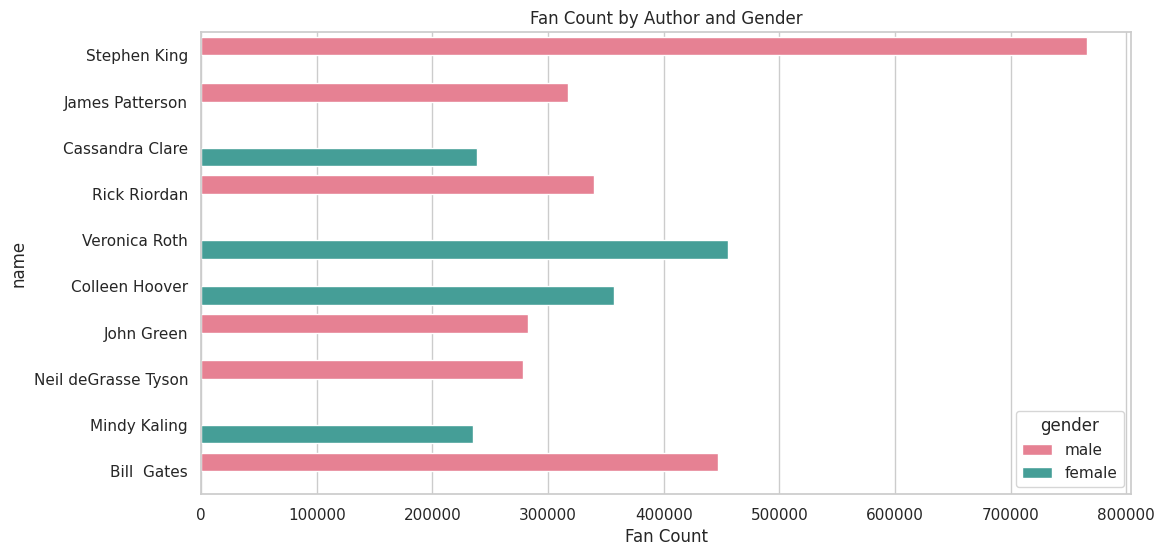

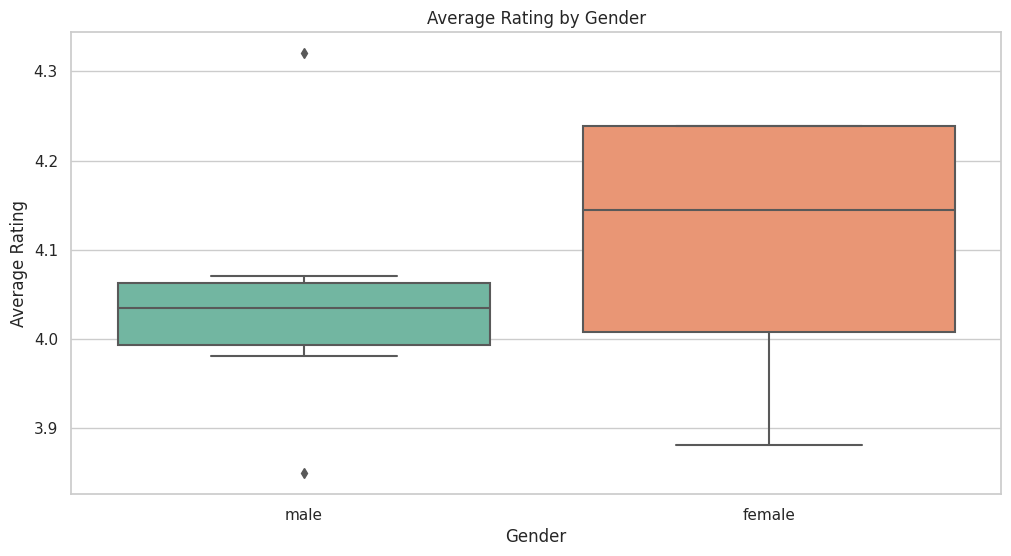

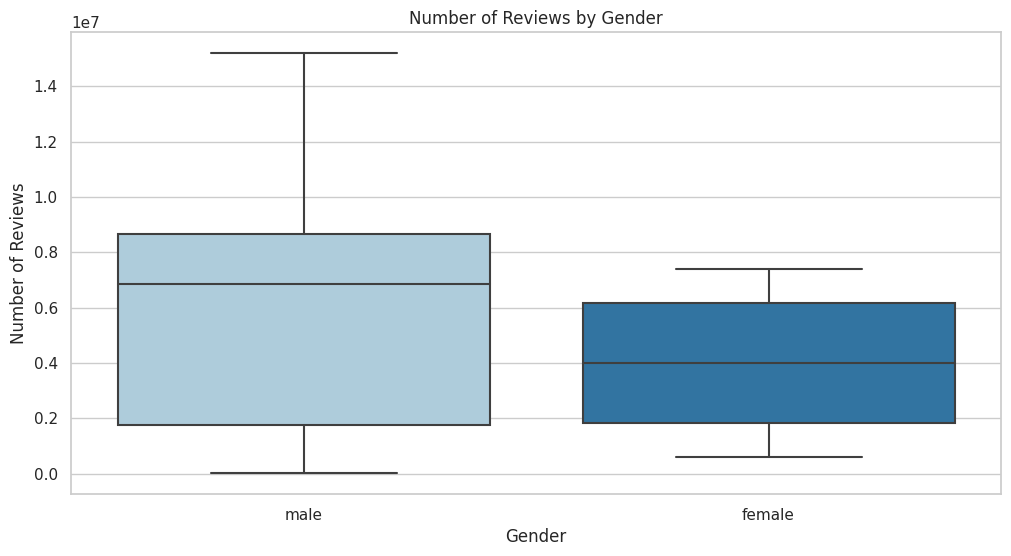

In [ ]:
import seaborn as sns
# Data analysis and visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot fan count by gender
sns.barplot(data=info_influent, x="fans_count", y="name", hue="gender", palette="husl")
plt.title("Fan Count by Author and Gender")
plt.xlabel("Fan Count")

# Show average rating by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=info_influent, x="gender", y="average_rating", palette="Set2")
plt.title("Average Rating by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Rating")

# Show number of reviews by gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=info_influent, x="gender", y="ratings_count", palette="Paired")
plt.title("Number of Reviews by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Reviews")

plt.show()

<Axes: title={'center': 'Gender Distribution'}>

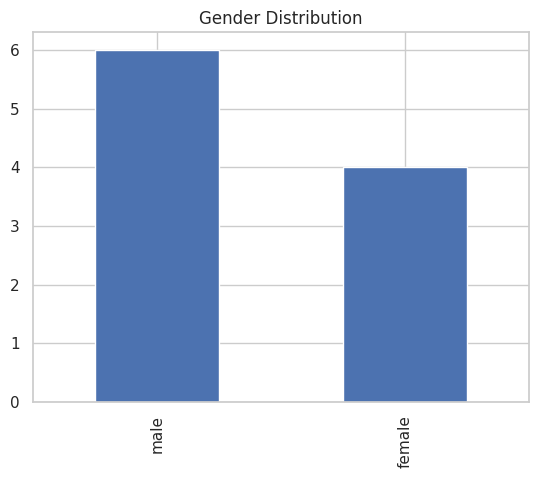

In [ ]:
# 2. Gender Distribution
gender_distribution = info_influent['gender'].value_counts()
gender_distribution.plot(kind='bar', title='Gender Distribution')


In [ ]:
# 3. Rating Analysis
rating_by_gender = info_influent.groupby('gender')['average_rating'].mean()
rating_by_gender

gender
female    4.102051
male      4.048502
Name: average_rating, dtype: float32

# RQ6

## Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

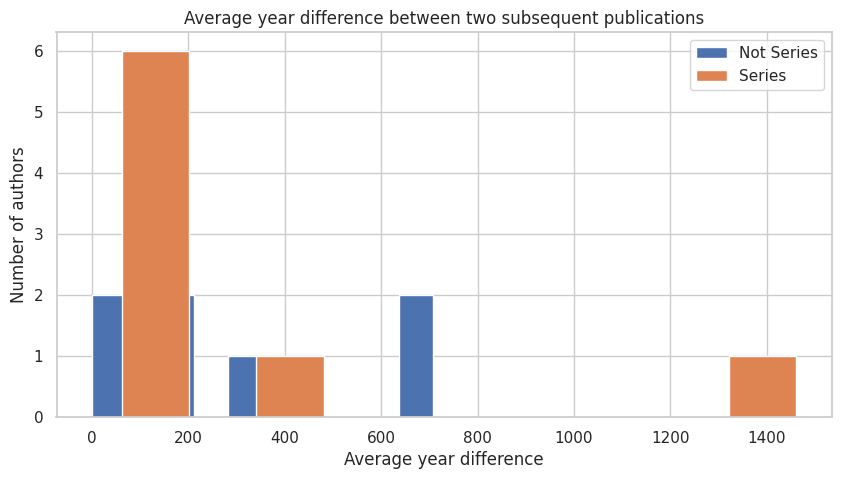

In [ ]:
df1.sort_values(by=['author_name', 'original_publication_date'], inplace=True)

# Converti la colonna 'original_publication_date' in datetime e calcola le differenze di giorni
df1['original_publication_date'] = pd.to_datetime(df1['original_publication_date'], errors='coerce')
df1['year_diff'] = df1.groupby('author_name')['original_publication_date'].diff().dt.days.fillna(0).astype(int)

# Calcola le medie per i libri non appartenenti a una serie
avg_year_diff_not_series = df1[df1['series_name'] == ''].groupby('author_name')['year_diff'].mean().reset_index()
avg_year_diff_not_series.rename(columns={'year_diff': 'avg_year_diff_not_series'}, inplace=True)

# Calcola le medie per i libri appartenenti a una serie
avg_year_diff_series = df1[df1['series_name'] != ''].groupby('author_name')['year_diff'].mean().reset_index()
avg_year_diff_series.rename(columns={'year_diff': 'avg_year_diff_series'}, inplace=True)

# Unisci i due dataframe
df1_year_diff = avg_year_diff_not_series.merge(avg_year_diff_series, on='author_name', how='outer')

# Grafico dei risultati
plt.figure(figsize=(10,5))
plt.hist(df1_year_diff['avg_year_diff_not_series'], bins=10, label='Not Series')
plt.hist(df1_year_diff['avg_year_diff_series'], bins=10, label='Series')
plt.xlabel('Average year difference')
plt.ylabel('Number of authors')
plt.title('Average year difference between two subsequent publications')
plt.legend()
plt.show()

<ipython-input-21-2a0d67a9391c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['original_publication_date'] = pd.to_datetime(df1['original_publication_date'], errors='coerce')


               id                                              title  \
26019       41623                              The Road Ahead CD-ROM   
143153     276292  Bill Gates the Road Ahead [Unabridged] (Audio ...   
143154     276293                    Camino Al Futura/The Road Ahead   
221408     457937                                     The Road Ahead   
472910    1081637                                     The Road Ahead   
...           ...                                                ...   
6909417  25211251       Quatre: un recueil divergent (Divergent, #4)   
6915034  25225061                      Divergente raconté par Quatre   
6969008  25367304                       Quatre (Divergence, 0.1-0.4)   
6982118  25402273     Divergent, de trilogie en het verhaal van Four   
7016411  25491828                                        分歧者外傳: Four   

        original_publication_date num_pages series_id series_name  \
26019                  1995-11-21                                 

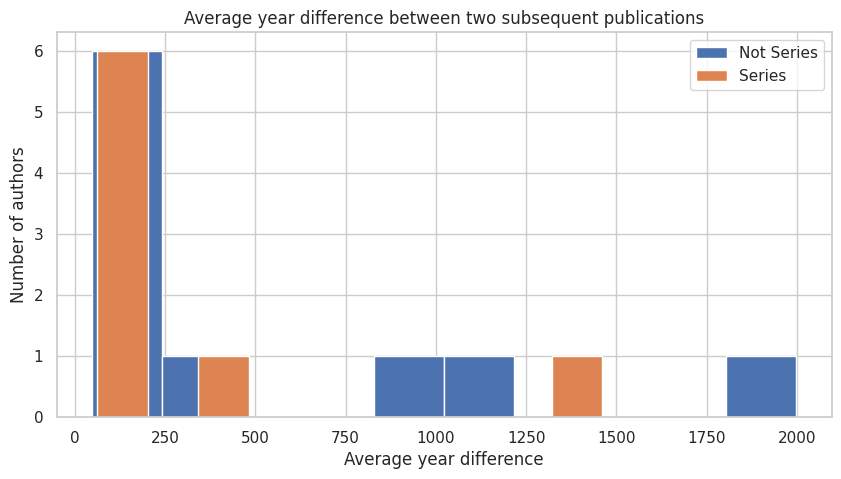

In [ ]:
authors_influential = df.sort_values(by = 'fans_count', ascending = False)
authors_influential = authors_influential[:10]
names_influent = authors_influential['name']
df1 = df_books[df_books['author_name'].isin(names_influent)]

#Converting the dates in date-format yy-mm-dd
df1['original_publication_date'] = pd.to_datetime(df1['original_publication_date'], errors='coerce')
#Calculate difference between two consecutive publication years for each author
#and each book
df1 = df1.sort_values(by=['author_name', 'original_publication_date'])
df1['year_diff'] = df1.groupby('author_name')['original_publication_date'].diff().dt.days
df1['year_diff'] = df1['year_diff'].fillna(0)
df1['year_diff'] = df1['year_diff'].astype(int)
print(df1)
df1 = df1[df1['year_diff'] != 0]

#Calculating average of year differences for books not belonging to a series
df1_not_series = df1[df1['series_name'] == '']
df1_not_series = df1_not_series.groupby('author_name')['year_diff'].mean()
df1_not_series = df1_not_series.reset_index()
df1_not_series = df1_not_series.rename(columns={'year_diff':'avg_year_diff_not_series'})
#Calculating average of year differences for books belonging to a series
df1_series = df1[df1['series_name'] != '']
df1_series = df1_series.groupby('author_name')['year_diff'].mean()
df1_series = df1_series.reset_index()
df1_series = df1_series.rename(columns={'year_diff':'avg_year_diff_series'})
#Merging the two dataframes
df1_year_diff = df1_not_series.merge(df1_series, on='author_name', how='outer')
#Plotting the results
plt.figure(figsize=(10,5))
plt.hist(df1_year_diff['avg_year_diff_not_series'], bins=10, label='Not Series')
plt.hist(df1_year_diff['avg_year_diff_series'], bins=10, label='Series')
plt.xlabel('Average year difference')
plt.ylabel('Number of authors')
plt.title('Average year difference between two subsequent publications')
plt.legend()
plt.show()

In [ ]:
df1_year_diff

,author_name,avg_year_diff_not_series,avg_year_diff_series
0,Bill Gates,1196.000000,NaN
1,Cassandra Clare,46.714286,113.115385
2,Colleen Hoover,93.000000,178.250000
3,James Patterson,90.518519,61.773109
4,John Green,355.600000,349.333333
5,Mindy Kaling,1998.500000,NaN
6,Neil deGrasse Tyson,867.375000,1461.000000
7,Rick Riordan,160.666667,109.301887
8,Stephen King,103.369942,67.089286
9,Veronica Roth,154.000000,108.444444


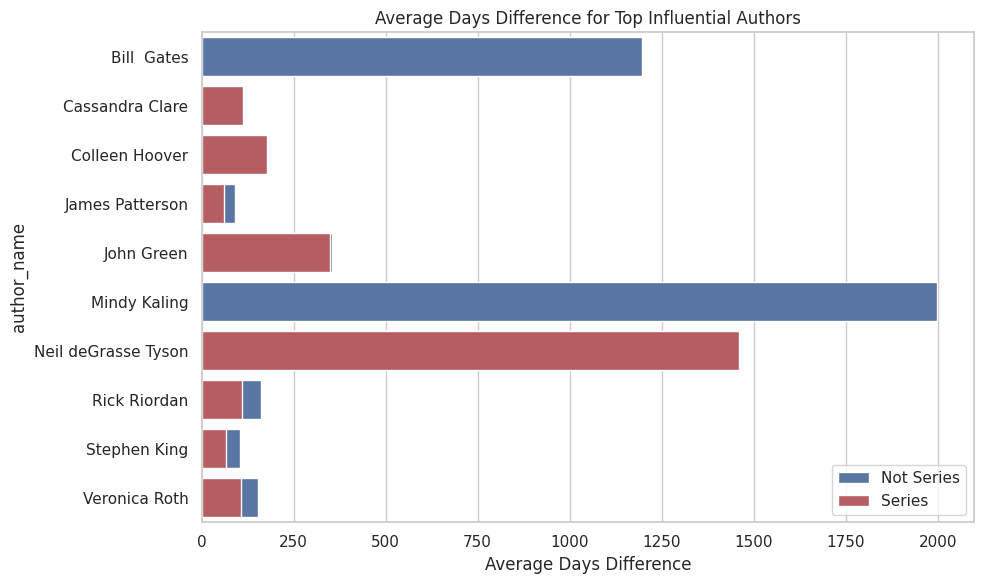

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=df1_year_diff, x='avg_year_diff_not_series', y='author_name', label='Not Series', color='b')
sns.barplot(data=df1_year_diff, x='avg_year_diff_series', y='author_name', label='Series', color='r')
plt.xlabel('Average Days Difference')
plt.title('Average Days Difference for Top Influential Authors')
plt.legend()
plt.tight_layout()

plt.show()

## For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [ ]:
def date_y(date):
    if pd.notna(date):
        return int(date.year)
    else:
        return 0

df1['publication_year'] = df1.original_publication_date.apply(date_y)

a = df1.groupby(['author_name', 'publication_year']).id.count().to_frame()
a.columns = ['count']
a = a.reset_index()

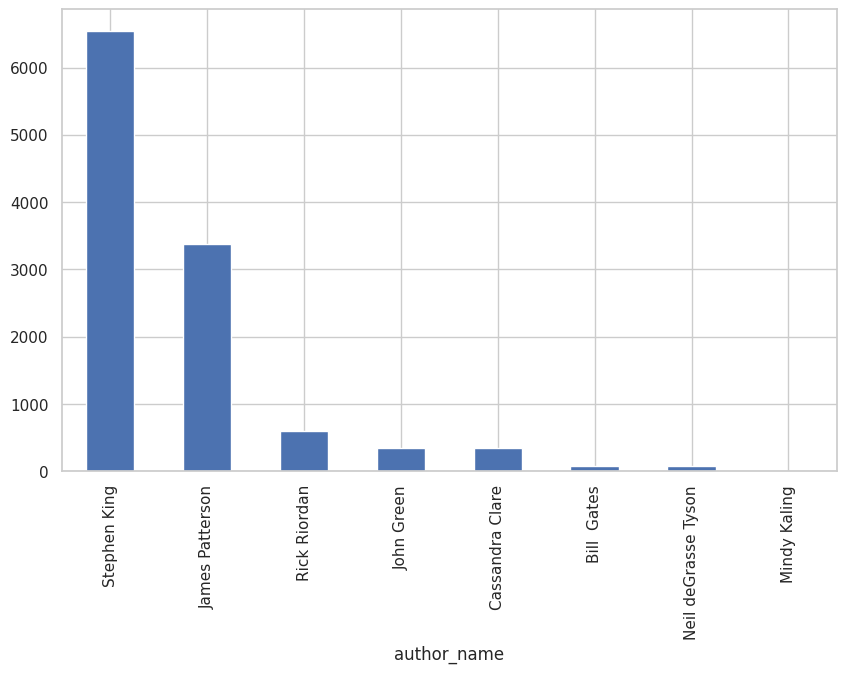

In [ ]:
def untily(year, df):
    df = df[df.publication_year < year]
    b = df.groupby(['author_name'])['count'].sum().sort_values(ascending=False)
    b.plot(kind='bar', figsize=(10, 6))
untily(2010, a)

# RQ8

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

#It seems reasonable to assume that authors with more fans should have more
#reviews, but maybe their fans are a bit lazy. Confirm or reject this with a
#convenient statistical test or a predictive model.
data_model = df[['fans_count', 'text_reviews_count']].astype(int)
data_model.dropna(inplace=True)

x = np.array(data_model['fans_count'])
y = np.array(data_model['text_reviews_count'])

# Dividiamo i dati in un insieme di addestramento e un insieme di test (80% - 20%).
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Creiamo un'istanza del modello di regressione lineare.
model = LinearRegression()
# Addestriamo il modello con i dati di addestramento.
model.fit(x_train, y_train)


# Calcoliamo il coefficiente di regressione.
coefficient = model.coef_[0]
intercept = model.intercept_


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
# Reduce memory usage casting more efficent data types
#df = pd.read_json(filename, lines=True, dtype=dtypes)

#It seems reasonable to assume that authors with more fans should have more
#reviews, but maybe their fans are a bit lazy. Confirm or reject this with a
#convenient statistical test or a predictive model.
data_model = df[['fans_count', 'text_reviews_count']].astype(int)
data_model = data_model[data_model.fans_count >= 0]
data_model.dropna(inplace=True)

x = np.array(data_model['fans_count'])
x = np.sort(x)[:int(0.9*len(x))]
y = np.array(data_model['text_reviews_count'])
y = np.sort(y)[:int(0.9*len(y))]
x1 = sm.add_constant(x)




model = sm.OLS(y, x1).fit()


model_summary = model.summary()


<ipython-input-76-a1f2428f3ad1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.dropna(inplace=True)


In [ ]:
model.params

array([-3.12789975,  3.10750477])

In [ ]:
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.904e+07
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:47:43   Log-Likelihood:            -8.7717e+05
No. Observations:              316569   AIC:                         1.754e+06
Df Residuals:                  316567   BIC:                         1.754e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1279      0.008   -389.141      0.0

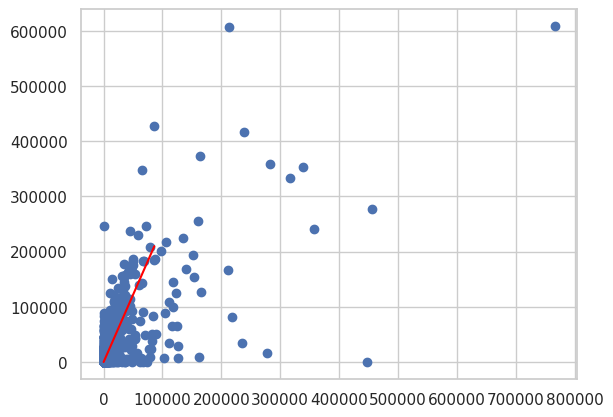

In [ ]:
plt.scatter(data_model.fans_count, data_model.text_reviews_count)
# Calculate the corresponding y values for the line
line_y = model.params[1] * x + model.params[0]

# Plot the line
plt.plot(x, line_y, color='red')

# Bonus 1

Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

In [ ]:
import time

# Set the chunk size
chunk_size = 100_000

# Create an empty DataFrame to store the filtered results
filtered_authors_pandas = pd.DataFrame()

# Measure the start time
start_time = time.time()

# Load the dataset in chunks
for chunk in pd.read_json(filename, lines=True, chunksize=chunk_size):
    # filter each chunk
    filtered_chunk = chunk[chunk['text_reviews_count'] >= 100]
    filtered_authors_pandas = pd.concat([filtered_authors_pandas, filtered_chunk])

# compute execcution time
pandas_exec_time = time.time() - start_time

print("Pandas Execution Time:", pandas_exec_time, "seconds")


Pandas Execution Time: 22.872453451156616 seconds


In [ ]:
#Pandas Execution Time: 244s

In [ ]:
import dask.dataframe as dd

# Load the dataset
df = dd.read_json(filename, blocksize='128MB')

# Measure the start time
start_time = time.time()

# Filter authors with at least 100 reviews
filtered_authors_dask = df[df['text_reviews_count'] >= 100].compute()

dask_exec_time = time.time() - start_time

print("Dask Execution Time:", dask_exec_time, "seconds")


Dask Execution Time: 28.63842749595642 seconds


In [ ]:
#Dask Execution Time: 208s

In [ ]:
print("Difference in execution time", (pandas_exec_time - dask_exec_time)*1000)

Difference in execution time -5765.974044799805


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 966.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=4661769ee43755aeb811ea657ee4f8becab1f84edaa8f2f25001d803e82ade2c
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
#Use pyspark for books.json file to avoid ram overload
from pyspark import SparkContext
from pyspark.sql import SparkSession

#Set pyspark parameters
sc = SparkContext("local", "YourAppName")
spark = SparkSession(sc)

#Read authors.json file
a = spark.read.json(filename)
#Rename the column to allow later the merge
a = a.withColumnRenamed("id", "author_id")
#Read books.json file
b =  spark.read.json(filename1)

# Merge the two dataframes performing a left join on 'b'
# By doig so you are including all rows from the 'b' dataframe and the matching rows from the 'a' dataframe
# Where the rows of 'a' don't match, the corresponding row will be fileld with null values
merged_df = b.join(a, "author_id", "left")

# Now we just need to count how many values of a consistent column coming from 'a', for example 'names', are null
unmatched = merged_df.filter(merged_df.name.isNull()).count()
print(f"Number of books without a matching author: {unmatched}")
print(merged_df.count())

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
# Sample DataFrames
books_data = {
    'book': ['Book1', 'Book2', 'Book4'],
    'author_id': [101, 102, 104]
}

authors_data = {
    'author': ['AuthorA', 'AuthorB', 'AuthorC'],
    'author_id': [101, 102, 103]
}

# Create DataFrames
books_df = pd.DataFrame(books_data)
authors_df = pd.DataFrame(authors_data)

# Merge the DataFrames based on "author_id" using an outer join
merged_df = books_df.merge(authors_df, on="author_id", how="outer")
print(merged_df)

# Count the number of rows where the author information is missing
books_without_author = merged_df[merged_df['author'].isna()]


# Get the count of books without a matching author
count_books_without_author = len(books_without_author)

print(f"Number of books without a matching author: {count_books_without_author}")


    book  author_id   author
0  Book1        101  AuthorA
1  Book2        102  AuthorB
2  Book4        104      NaN
3    NaN        103  AuthorC
Number of books without a matching author: 1


# Bonus 2

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans

# Create a CountVectorizer
vectorizer = CountVectorizer()
# Determine the number of clusters, according to wikipedia and other sources there are 4
# main literary genres (fiction, non-fiction, poetry, drama)
num_clusters = 4
import io
import re

chunk_size = 100000
res = []
for chunk in pd.read_json(filename, lines=True, chunksize=chunk_size):
    for i in chunk['about']:
        if i != '':
            # Create a file handle from the input string
            file_handle = io.StringIO(i)
            soup = BeautifulSoup(file_handle, 'html.parser')
            # Get the cleaned text
            cleaned_text = soup.get_text()
            # Remove leading and trailing whitespaces
            cleaned_text = cleaned_text.strip()
            cleaned_text = cleaned_text.lower()

            # Remove special characters, punctuation, and extra whitespaces
            cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)

            # Remove extra whitespaces
            cleaned_text = ' '.join(cleaned_text.split())
            res.append(cleaned_text)
df = pd.DataFrame(res, columns=['about'])
descriptions_bow = vectorizer.fit_transform(df['about'])
kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(descriptions_bow)
df['genre'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for i in range(10):
    print(df.iloc[i])

about    douglas nol adams was an english author comic ...
genre                                                    0
Name: 0, dtype: object
about    william mcguire bill bryson obe frs was born i...
genre                                                    0
Name: 1, dtype: object
about    jude fisher is the pseudonym for jane johnson ...
genre                                                    3
Name: 2, dtype: object
about    james hamiltonpatersons work has been translat...
genre                                                    1
Name: 3, dtype: object
about    mark andrew watson born february is an english...
genre                                                    3
Name: 4, dtype: object
about    edith newbold jones was born into such wealth ...
genre                                                    0
Name: 5, dtype: object
about    httpsearchbarnesandnoblecombookluther butler l...
genre                                                    3
Name: 6, dtype: object
about    alth

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from bs4 import BeautifulSoup
import io
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
# Define genre keywords or adjectives
genre_keywords = {
    'fiction': ['fiction', 'mystery', 'romance', 'mythology', 'fantasy', 'dystopian', 'horror'],
    'non-fiction': ['nonfiction', 'inform' 'textbooks', 'essays', 'autobiography', 'biography' 'research'],
    'poetry': ['poem', 'literature', 'epic', 'lyric' 'poetry', 'poet', 'poetic'],
    'drama': ['drama', 'audience', 'actors', 'characters', 'acts', 'tragedy', 'comedy']
}


#Use tf-idf instead of the raw frequencies of occurrence of a token in a given document
# to scale down the impact of tokens that occur very frequently

chunk_size = 100000
res = []
for chunk in pd.read_json(filename, lines=True, chunksize=chunk_size):
    for i in chunk['about']:
        if i != '':
            # Create a file handle from the input string
            file_handle = io.StringIO(i)
            soup = BeautifulSoup(file_handle, 'html.parser')
            # Get the cleaned text
            cleaned_text = soup.get_text()
            # Remove leading and trailing whitespaces
            cleaned_text = cleaned_text.strip()
            cleaned_text = cleaned_text.lower()

            # Remove special characters, punctuation, and extra whitespaces
            cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)

            # Remove extra whitespaces
            cleaned_text = ' '.join(cleaned_text.split())
            res.append(cleaned_text)
df = pd.DataFrame(res, columns=['about'])
# Transform descriptions and keywords into TF-IDF vectors
#description_tfidf = tfidf_vectorizer.fit_transform(df['about'])
#genre_tfidf = {genre: tfidf_vectorizer.fit_transform(keywords) for genre, keywords in genre_keywords.items()}

vectorizer = CountVectorizer().fit(df['about'])
genre_bag = {genre: vectorizer.transform(keywords) for genre, keywords in genre_keywords.items()}


# Classify descriptions based on cosine similarity
def classify_description(description):
    #similarity_scores = {genre: cosine_similarity(description_tfidf, genre_tfidf[genre], dense_output=False).mean() for genre in genre_keywords}
    similarity_scores = {genre: cosine_similarity(vectorizer.transform([description]), bag)[0][0] for genre, bag in genre_bag.items()}
    print(max(similarity_scores, key=similarity_scores.get))
    return max(similarity_scores, key=similarity_scores.get)

# Add genre labels to the DataFrame
df['genre'] = df['about'].apply(classify_description)


Output streaming troncato alle ultime 5000 righe.
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
non-fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
non-fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
drama
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction
fiction


In [ ]:
df

NameError: ignored

# AWS

In [ ]:
#scp -i "mykeypair.pem" list.json ubuntu@ec2-18-232-83-254.compute-1.amazonaws.com:
#scp -i mykeypair.pem AWSQ.py ubuntu@ec2-67-202-18-229.compute-1.amazonaws.com:
#ssh -i "mykeypair.pem" ubuntu@ec2-54-198-218-186.compute-1.amazonaws.com

# By running the python code using the magic command '%%timeit' in a jupyter notebook,
# we get:
# 26.4 s ± 5.96 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
# This is better than simply using tge time.start, time.end functions since the code is rune multiple times
# and you get an average of the running time

#time python3 AWSQ.py

#real    0m34.116s
#user    0m27.506s
#sys     0m1.115s

# to dwonload from bucket aws s3 cp s3://admlab1bucket/list.json .


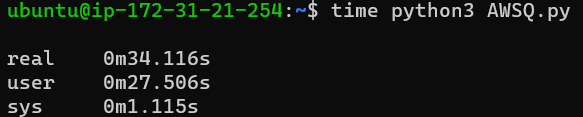